Email:farhadulislam84054@gmail.com

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Question : 1
20 Marks
Load the TrainingHours column into a NumPy array.
Convert to float datatype


Find mean & standard deviation

Final output: Two numeric values






In [ ]:
df=pd.read_csv('final-employee-ds.csv')
col=df['TrainingHours']
a=np.array(col,dtype=float)
print(a.mean())
print(a.std())



24.19
13.842467265628624


Question : 2
20 Marks
Handle missing values (if any):
Fill missing Salary with department-wise median


Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5

Final output: One numeric value





In [ ]:
df=pd.read_csv('final-employee-ds.csv')
df_copy=df.copy()

ans=df.groupby('Department')['Salary'].median()

def solve(x):

  if pd.isnull(x['Salary']):
    return ans[x['Department']]
  else:
    return x['Salary']


df['Salary']=df.apply(solve,axis=1)

print(df_copy['Salary'].isnull().sum())

print(df['Salary'].isnull().sum())


sum= df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)]
ss=sum['Salary'].sum()
print(ss)


4
0
1985775.5


Question : 3
20 Marks

Filter employees who:
Department = "IT" or "Finance"


Age between 30–45


PerformanceScore > 88


Sort by Salary descending

Final output: Table with Name, Department, Salary, PerformanceScore





In [ ]:
ndf=df[
    ((df['Department']=='IT') | (df['Department']=='Finance')) &
    (df['Age']>=30) & (df['Age']<=45) &
    (df['PerformanceScore']>85)

    ]

ndf=ndf.sort_values(by='Salary',ascending=False)
ndf=ndf[['Name','Department','Salary','PerformanceScore']]
ndf

,Name,Department,Salary,PerformanceScore
94,Employee_95,IT,140386.0,94
88,Employee_89,Finance,126027.0,92
12,Employee_13,Finance,99638.0,88
4,Employee_5,Finance,85543.0,97
32,Employee_33,IT,83919.0,98
55,Employee_56,Finance,49540.0,94


Question : 4
20 Marks
Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)
Filter top 5 employees by SalaryPerHour

Final output: Table(5 Rows) with Name, SalaryPerHour







In [ ]:
df['SalaryPerHour']=df['Salary']/(df['WorkHoursPerWeek']*4)
tt=df.sort_values(by='SalaryPerHour',ascending=False).head(5)
(tt[['Name','SalaryPerHour']])



,Name,SalaryPerHour
46,Employee_47,981.278571
27,Employee_28,971.292857
31,Employee_32,967.392857
79,Employee_80,945.335526
80,Employee_81,937.858974


Create a stacked bar chart showing the count of employees in each Department, separated by Gender.
Dataset Columns Used:
Department → Categorical variable (IT, Finance, HR, Marketing, Management)


Gender → Categorical variable (Male, Female)

Expected Output
A stacked bar chart where:


x-axis → Department


y-axis → Number of employees


Each bar split into Male and Female segments


Colors differentiate gender


## Question e bolce stack bar but question instructione bolce Male female duita bar...Confusing

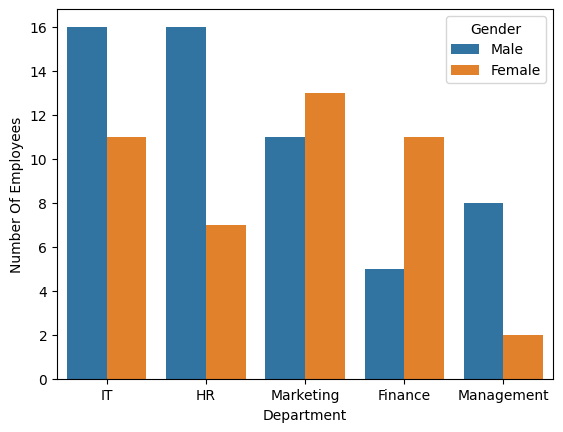

In [ ]:

nwdf=df[['Department','Gender']].value_counts().reset_index()
nwdf
sns.barplot(data=nwdf,x='Department',y='count',hue='Gender')
plt.ylabel('Number Of Employees')
plt.show()

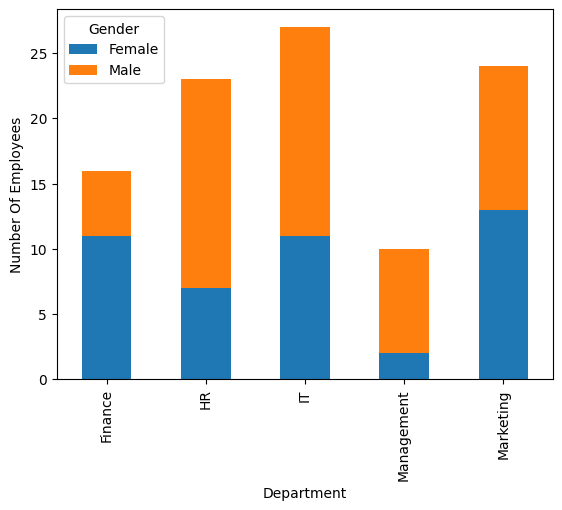

In [ ]:


df=pd.read_csv('final-employee-ds.csv')
nwwdf=df.groupby(['Department','Gender']).size().unstack()

nwwdf.plot(
    kind='bar',
    stacked=True
)
plt.ylabel('Number Of Employees')
plt.show()